In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [112]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [113]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [114]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [115]:
#preview data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Loai bo so thu tu khong can thiet

In [116]:
train_data.set_index(train_data.PassengerId, inplace=True)
train_data.drop('PassengerId', axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Thay doi file test.csv nhuw file train.csv

In [117]:
test_data = pd.read_csv('./data/test.csv', index_col="PassengerId")
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Phan loai cac loai dac trung

Chuyen doi dtype cua cot

In [118]:
train_data["Survived"] = train_data["Survived"].astype("category")
train_data["Survived"].dtype
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [119]:
feartures = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(data, feartures):
  for fearture in feartures:
    data[fearture] = data[fearture].astype("category")
convert_cat(train_data, feartures)
convert_cat(test_data, feartures)    

In [120]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


Phan bo so hoc (O day la do tuoi caua hanh khach)

In [121]:
train_data.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Distribution of categorical feartures

In [122]:
train_data.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


Kham pha phan tich du lieu (exploratory data analysis-EDA)

Target variable: Survived

In [123]:
train_data["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


Chuyen thanh %

In [124]:
train_data["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


Phan loai gioi tinh

In [125]:
train_data['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [126]:
train_data['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

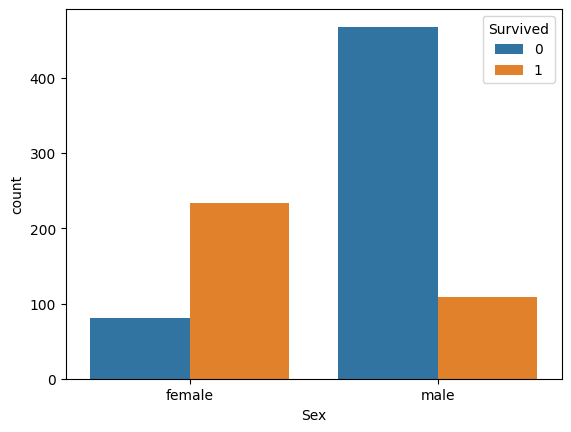

In [127]:
sns.countplot(data=train_data, x='Sex', hue='Survived')

Tao bieu do dua tren feartues

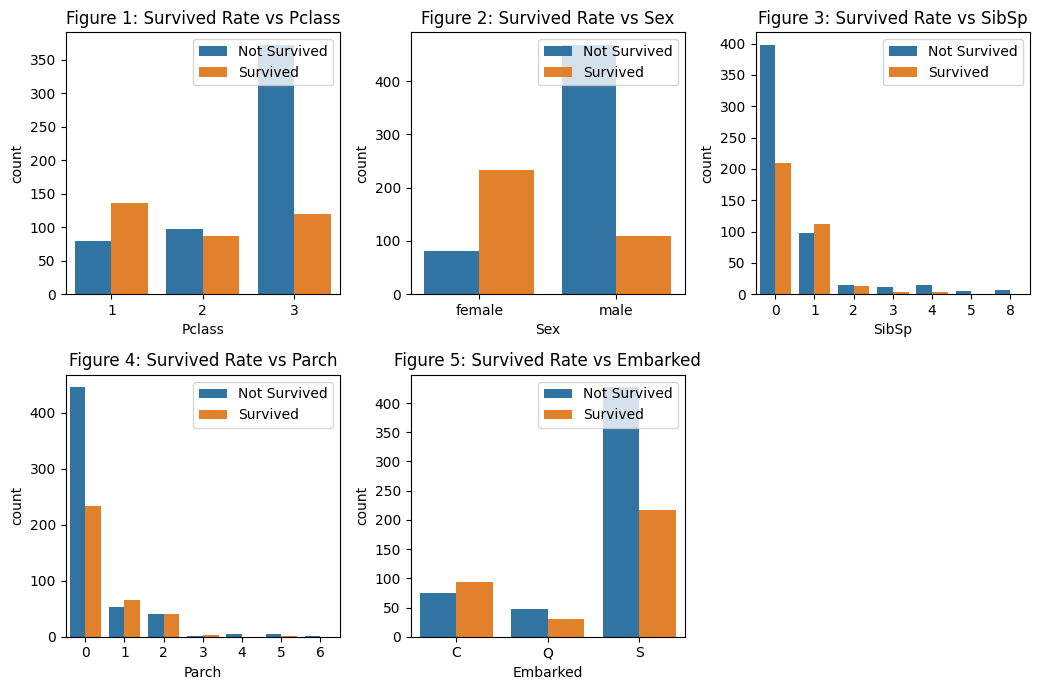

In [128]:

cols = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3.5, n_rows * 3.5))

for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c
        if i < len(cols):  # Check to avoid IndexError
            ax_i = ax[r, c]
            sns.countplot(data=train_data, x=cols[i], hue="Survived", ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survived Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=["Not Survived", "Survived"])
        else:
            ax[r, c].axis("off")  # Hide extra subplot if no data to plot

plt.tight_layout()
plt.show()


Phan bo tuoi va gia ve

<Axes: xlabel='Age', ylabel='Count'>

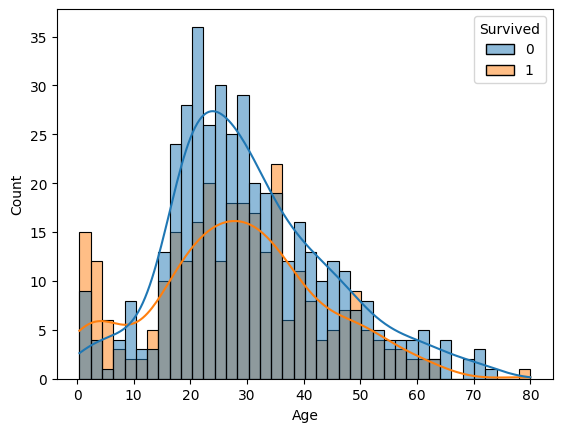

In [129]:
sns.histplot(data=train_data, x='Age', hue='Survived', bins=40, kde=True)

In [130]:
train_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

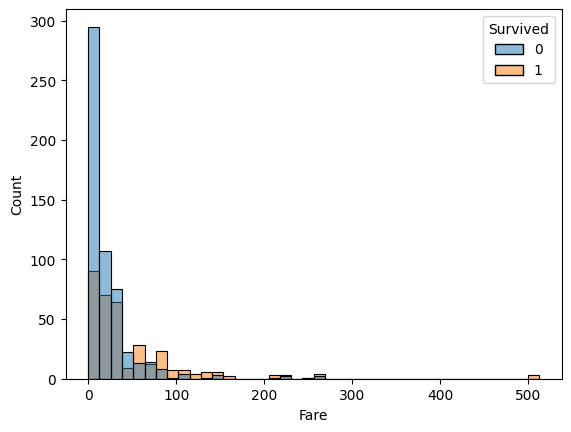

In [131]:
sns.histplot(data=train_data, x='Fare', hue='Survived', bins=40)

Chia cac hang ve

<Axes: xlabel='Fare', ylabel='count'>

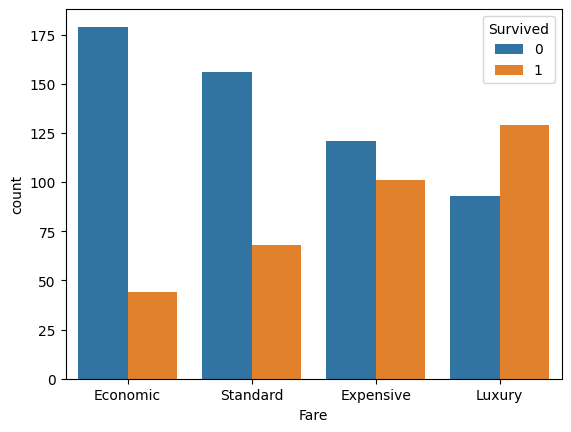

In [132]:
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data=pd.qcut(train_data['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_data['Survived'])

In [133]:
train_data['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [134]:
train_data['Name'].head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [135]:
import re #egular express

def extract_title(name):
  p = re.compile(r", ([\w\s]+)\.")
  return p.search(name).groups(1)[0].strip()
train_data['Title'] = train_data['Name'].apply(lambda name: extract_title(name))

In [136]:
train_data['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [137]:
test_data['Title'] = test_data['Name'].apply(lambda name: extract_title(name))

In [138]:
test_data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [139]:
def groups_title(title):
  if title in ['Mr', 'Mrs', 'Miss', 'Master']:
    return title
  elif title == 'Ms':
    return "Miss"
  else:
    return "Others"
train_data['Title'] = train_data['Title'].apply(lambda title: groups_title(title))
test_data['Title'] = test_data['Title'].apply(lambda title: groups_title(title))

<Axes: xlabel='Title', ylabel='count'>

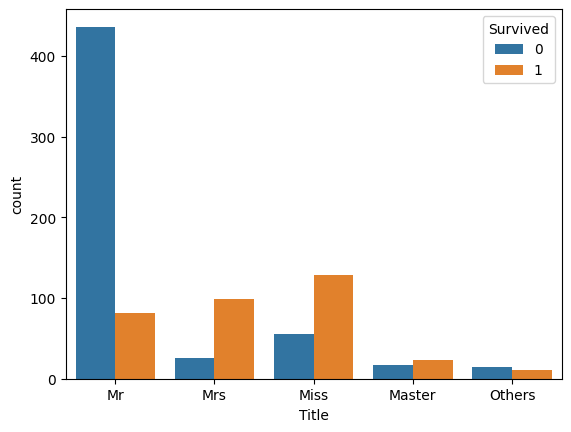

In [140]:
sns.countplot(data=train_data, x='Title', hue='Survived')

Family feature
> Sinsp, parch

In [141]:
train_data['Family_Size'] = train_data['SibSp'].astype('int') + train_data['Parch'].astype('int') + 1
test_data['Family_Size'] = test_data['SibSp'].astype('int') + test_data['Parch'].astype('int') + 1

<Axes: xlabel='Family_Size', ylabel='count'>

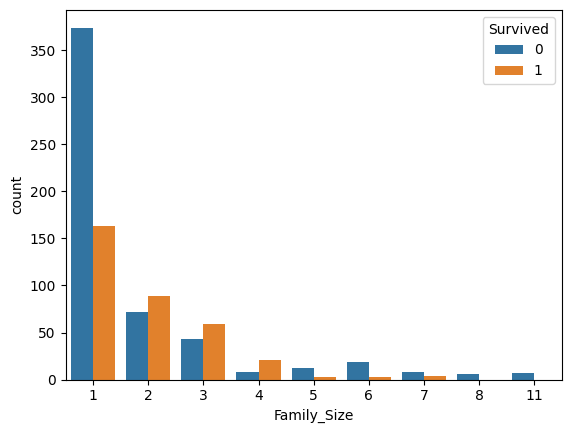

In [142]:
sns.countplot(data=train_data, x='Family_Size', hue='Survived')

Phan loai theo luong nguoi di cung(nhu tren nhg dung 1 ham khac)

In [143]:
train_data['Family_Cat'] = train_data['SibSp'].astype('int') + train_data['Parch'].astype('int') + 1
test_data['Family_Cat'] = test_data['SibSp'].astype('int') + test_data['Parch'].astype('int') + 1

<Axes: xlabel='Family_Cat', ylabel='count'>

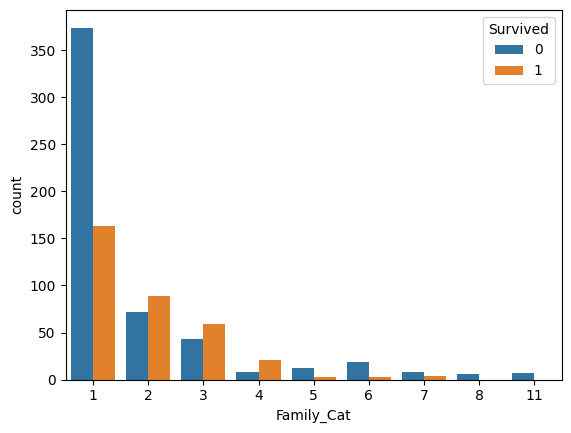

In [144]:
sns.countplot(data=train_data, x='Family_Cat', hue='Survived')

Data_Wrangling 

In [145]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked','Title', 'Family_Cat']
fearture_cols = num_features + cat_features

print(fearture_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [146]:
def display_missing(data, fearture_cols):
  for col in fearture_cols:
    missing_count = data[col].isnull().sum()
    if missing_count > 0:
      print(f" Clo {col} nas {missing_count} missing values.")
      
display_missing(train_data, fearture_cols)      

 Clo Age nas 177 missing values.
 Clo Embarked nas 2 missing values.


In [147]:
def display_missing(data, fearture_cols):
  n_rows = data.shape[0]
  for col in fearture_cols:
    missing_count = data[col].isnull().sum()
    if missing_count > 0:
      print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")
      
display_missing(train_data, fearture_cols)  
display_missing(test_data, fearture_cols)

Age has 19.87% missing values.
Embarked has 0.22% missing values.
Age has 20.57% missing values.
Fare has 0.24% missing values.


### Filling missing value

Age

In [148]:
age_by_sex_pclass = train_data.groupby(['Sex', 'Pclass'])['Age'].median()

C:\Users\NMH\AppData\Local\Temp\ipykernel_13044\3516024357.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_pclass = train_data.groupby(['Sex', 'Pclass'])['Age'].median()


In [149]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [150]:
# Filling the missing values in Age with The medians of Sex and Pclass groups

train_data['Age'] = train_data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test_data['Age'] = test_data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


C:\Users\NMH\AppData\Local\Temp\ipykernel_13044\3405477263.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data['Age'] = train_data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
C:\Users\NMH\AppData\Local\Temp\ipykernel_13044\3405477263.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_data['Age'] = test_data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [151]:
display_missing(train_data, fearture_cols)
display_missing(test_data, fearture_cols)

Embarked has 0.22% missing values.
Fare has 0.24% missing values.


In [152]:
X = train_data[fearture_cols]
y = train_data['Survived']

In [153]:
X_test =test_data[fearture_cols]

In [154]:
#prepocess pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps=[
  ('impute', SimpleImputer(strategy='median')),
  ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
  ('impute', SimpleImputer(strategy='most_frequent')),
  ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [155]:
preprocessor = ColumnTransformer(transformers=[
  ('num', num_transformer, num_features),
  ('cat', cat_transformer, cat_features)
])

In [156]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [157]:
X = preprocessor.transform(X)

In [158]:
X_test = preprocessor.transform(X_test)

### Model training

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [160]:
X_train.shape, X_val.shape

((712, 24), (179, 24))

In [161]:
X_test.shape

(418, 24)

### ML model

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

In [163]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [164]:
log_reg.score(X_val, y_val)

0.8379888268156425

In [165]:
y_pred = log_reg.predict(X_val)

In [166]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.8095238095238095, 0.75)

In [167]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       111
           1       0.81      0.75      0.78        68

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [168]:
poly = PolynomialFeatures(degree=2)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

In [169]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [170]:
poly_log_reg.score(poly_features_X_val, y_val)

0.8156424581005587

In [171]:
# Decision Tree

decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth=8, random_state=2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [172]:
decision_tree.score(X_val, y_val)

0.8156424581005587

### Cross Validation

In [173]:
from sklearn.model_selection import cross_val_score

In [174]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion= 'entropy', max_depth=8, random_state=2022)

lr_scores = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)

In [175]:
lr_scores.mean(), lr_scores.std()

(np.float64(0.8271608813006088), np.float64(0.02229632534042396))

In [176]:
dt_scores = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)

In [177]:
dt_scores.mean(), dt_scores.std()

(np.float64(0.8058565061829139), np.float64(0.015445347443517398))

### Baseline Model Comparison

In [178]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [186]:
seed = 2025
models = [
  LinearSVC(max_iter=12000,random_state=seed),
  SVC(random_state=seed),
  KNeighborsClassifier(metric='minkowski', p=2),
  LogisticRegression(solver='liblinear', max_iter=1000),
  DecisionTreeClassifier(random_state=seed),
  RandomForestClassifier(random_state=seed),
  ExtraTreesClassifier(),
  AdaBoostClassifier(),
  XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
  
]

In [196]:
from sklearn.model_selection import StratifiedGroupKFold

def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    kfold = StratifiedGroupKFold(cv, shuffle=True, random_state=seed) 
    entries = []

    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)

        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_data = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy_score'])    
    
    if plot_results:
      sns.boxplot(x='model_name', y='accuracy_score', data=cv_data, color='lightblue', showmeans=True)
      plt.title("Box")
      plt.xticks(rotation=25)
      plt.show()
    return cv_data    
generate_baseline_results(models, X, y, metrics='accuracy', cv=5, plot_results=False)



TypeError: iteration over a 0-d array